##### O objetivo desse notebook é transformar dados brutos em insights importantes, o foco é mostrar como cada  analise aproxima o conjunto de dados das respostas que buscamos.

##### Ao final deste, as principais descobertas serão consolidadas em um resumo objetivo para facilitar a comunicação no relatório e no README.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

In [21]:
script_dir = os.getcwd() 
vendas = os.path.join(script_dir, "Sales_Data", "total_vendas.csv")
df = pd.read_csv(vendas)
df["data"] = pd.to_datetime(df["data"], dayfirst=True).dt.normalize()

In [22]:
df.head()

,data,cliente,id_produto,descricao,quantidade,valor_und,forma_pag
0,2025-02-28,1.0,426,COPO TERMICO 1200ML STANLEY,2.0,120.00,PIX
1,2025-02-22,1.0,453,BOLSA SILICONE INFANTIL,1.0,29.99,PIX
2,2025-02-22,1.0,686,EMBALAGEM SACO,1.0,2.00,PIX
3,2025-02-28,1.0,583,BOLSA MOCHILA ESPORTIVA,2.0,49.99,PIX
4,2025-02-28,1.0,425,COPO TERMICO MUSICAL,1.0,49.99,PIX


Quantas vendas foram feitas:

In [23]:
len(df)

5853

Qual foi o período coberto por esse relatório de vendas:

In [24]:
menorData = df["data"].min()
maiorData = df["data"].max()
print((maiorData - menorData).days, "dias")


288 dias


Quantos produtos diferentes se tem registro:

In [25]:
df["id_produto"].nunique()

1105

# Análise de produtos
###### * Os grandes agrupamentos serão imitados a 50 para melhor visualização

Quantos dos produtos unicos que temos no estoque foram vendidos apenas UMA unidade:

In [26]:
df_unicos = df.groupby("id_produto").filter(lambda x: len(x) == 1)
df_unicos = df_unicos[["id_produto","descricao"]]
print(df_unicos.head(50).to_string(index=False))

 id_produto                                             descricao
        117                                COLA BASTAO MONSTRINHO
        920                                  CINTO COUNTRY NORMAL
        139                                    GIZ CERA FOFY C/12
        316                                MAQUIAGEM THE LOVE KIT
        438                                        BOLSA DIVERSAS
        730                 CONJFOLHEADO BRINCO/CORRENTE/PINGENTE
       1063                         KIT NECESSERIE PROMOÇÃO TAM G
        675                                  BICO PATO INDIVIDUAL
        145                    MARCA TEXTO PROMOÇÃO BLOCO C/7 UND
       1002                           BICO PATO ACETATO C/4 METAL
        169                               PELUCIA TARTARUGA NINJA
       1087                              CAMISA MASCULINA 1 LINHA
        948                 CONJFOLHEADO BRINCO/CORRENTE/PINGENTE
        869                        BOLSA CAPIVARA PELUCIA LATERAL
        32

Quantos produtos foram vendidos mais de 10 vezes:

In [27]:
df_morethanten = df.groupby("id_produto").filter(lambda x: len(x) >= 10) 
df_morethanten["qnt"] = df_morethanten.groupby("id_produto")["id_produto"].transform("count")
df_morethanten = df_morethanten[["id_produto","descricao", "qnt", "valor_und"]].drop_duplicates()
print(df_morethanten.head(50).to_string(index=False))

 id_produto                                        descricao  qnt  valor_und
        686                                   EMBALAGEM SACO  189       2.00
        425                             COPO TERMICO MUSICAL   13      49.99
        235         SACOLA DE PAPEL P/ PRESENTE COM ALÇA PEQ   23       7.00
          2                       CANETA SIMPLES C/ PONTEIRA   27       6.00
        923                             LAÇO INFANTIL JUNINO   19      20.00
        399                                       LAÇO CREPE   13      13.00
        826                         COLAR CORDÃO AMIZADE C/2   13       8.00
        958                CAPIVARA PULSEIRA PELUCIA PEQUENA   20      50.00
        953                     BOBBIE GOODS CAPIVARA GRANDE   19      30.00
        490                                 LIGA DE SILICONE   14       2.99
        392                   LENCO QUADRADO DE CETIM GRANDE   26      20.00
        699                           BRINCO RESINADO BIJOUX   13      15.00

Ranking dos produtos que mais foram vendidos:

In [28]:
df_ranking25 = df.groupby("id_produto").filter(lambda x: len(x) >= 1) 
df_ranking25["qnt"] = df_ranking25.groupby("id_produto")["id_produto"].transform("count")
df_ranking25 = df_ranking25.sort_values("qnt", ascending=False)
df_ranking25 = df_ranking25[["id_produto","descricao", "qnt"]].drop_duplicates()
print(df_ranking25.head(50).to_string(index=False))


 id_produto                                  descricao  qnt
        686                             EMBALAGEM SACO  189
       1329      MEIA INFANTIL 3D PERSONAGENS FEMININO   62
        484      KIT XUXINHA SIMPLES FINA INFANTIL C/6   53
        484                       XUXINHA KIT INFANTIL   53
        484          KIT XUXINHA SIMPLES FINA INFANTIL   53
        491                           LIGA DE SILICONE   50
        835                        SQUISHY PERSONAGENS   50
        881                      BOBBIE GOODS DIVERSOS   50
        881                               BOBBIE GOODS   50
        500                  PULSEIRA CORDÃO AJUSTAVEL   47
        560                                      TIARA   37
        560                               TIARA ADULTO   37
        373                           GLOSS 3D FEBELLA   35
        457                   LAÇO INFANTIL INDIVIDUAL   35
       1336               ACESSORIO PARA CABELO MALUCO   35
        753                       LIP OI

Qual o produto que mais teve renda gerada:

In [29]:
df_ranking = df.groupby("id_produto").filter(lambda x: len(x) >= 1) 
df_ranking["qnt"] = df_ranking.groupby("id_produto")["id_produto"].transform("count")
df_ranking["total_valor"] = df_ranking.groupby("id_produto")["valor_und"].transform("sum")
df_ranking = df_ranking.sort_values("total_valor", ascending=False)
df_ranking_final = df_ranking[["id_produto", "descricao", "qnt", "total_valor"]].drop_duplicates()

print(df_ranking_final.head(50).to_string(index=False))

 id_produto                                            descricao  qnt  total_valor
       1329                MEIA INFANTIL 3D PERSONAGENS FEMININO   62      2170.00
        176                         KIT TOUCH 24 PCS PONTA DUPLA   31      1999.92
        176                         KIT TOUCH PONTA DUPLA 24 PCS   31      1999.92
        176                         KIT TOUCH 10 PCS PONTA DUPLA   31      1999.92
       1295                              MEIA INFANTIL 3D STITCH   29      1739.71
        881                                         BOBBIE GOODS   50      1659.87
        881                                BOBBIE GOODS DIVERSOS   50      1659.87
         41                                         BOBBIE GOODS   19      1010.00
         41                                BOBBIE GOODS CAPIVARA   19      1010.00
        958                    CAPIVARA PULSEIRA PELUCIA PEQUENA   20       919.84
        426                          COPO TERMICO 1200ML STANLEY    7       878.98
    

# Análise temporal

Qual a média de compras feitas por dia/semana/mês:

Dia:

In [30]:
df_byday = df.groupby("data")[["quantidade"]].sum()
print(round(df_byday["quantidade"].mean()))

30


Semana:

In [31]:
df_byweek = df.copy()
df_byweek["data"] = pd.to_datetime(df_byweek["data"], dayfirst=True)
df_byweek["ano_semana"] = df_byweek["data"].dt.to_period("W")
df_sum_week = df_byweek.groupby("ano_semana")[["quantidade"]].sum().reset_index()

print(round(df_sum_week["quantidade"].mean()))

174


Mês:

In [32]:
df_bymonth = df.copy()
df_bymonth["data"] = pd.to_datetime(df_bymonth["data"], dayfirst=True)
df_bymonth["ano_mes"] = df_bymonth["data"].dt.to_period("M")
df_bymonth = df_bymonth.groupby("ano_mes")[["quantidade"]].sum().reset_index()
media_mensal = df_bymonth["quantidade"].mean()
print(round(media_mensal))


616


Quantas compras foram feitas em cada mês com seus respectivas rendas:

In [33]:
df_bymonth = df.copy()
df_bymonth["data"] = pd.to_datetime(df_bymonth["data"], dayfirst=True)
df_bymonth["ano_mes"] = df_bymonth["data"].dt.to_period("M")
df_bymonth = df_bymonth.groupby("ano_mes")[["quantidade"]].sum().reset_index()
print(df_bymonth.to_string(index=False))

ano_mes  quantidade
2025-01        21.0
2025-02       440.0
2025-03       398.0
2025-04       672.0
2025-05       807.0
2025-06       690.0
2025-07       810.0
2025-08       694.0
2025-09       614.0
2025-10      1462.0
2025-11       171.0


Quais foram os produtos mais vendidos 1 semana antes do dia dos Pais/Mães/Pascoa/Crianças:

In [34]:
df_byweek = df.copy()
df_byweek["data"] = pd.to_datetime(df_byweek["data"])
df_byweek = df_byweek.sort_values("quantidade", ascending=False)

semanaPais = (df_byweek["data"] >= pd.to_datetime("2025-05-05")) & (df_byweek["data"] <= pd.to_datetime("2025-05-11"))
semanaMaes = (df_byweek["data"] >= pd.to_datetime("2025-08-04")) & (df_byweek["data"] <= pd.to_datetime("2025-08-10"))
semanaPascoa = (df_byweek["data"] >= pd.to_datetime("2025-04-14")) & (df_byweek["data"] <= pd.to_datetime("2025-04-20"))
semanaCrianca = (df_byweek["data"] >= pd.to_datetime("2025-10-06")) & (df_byweek["data"] <= pd.to_datetime("2025-10-12"))


df_semanaPais = df_byweek.loc[semanaPais]                            
print("Semana do dia dos Pais: ",df_semanaPais["quantidade"].sum())

df_semanaMaes = df_byweek.loc[semanaMaes]                            
print("Semana do dia das Mães: ",df_semanaMaes["quantidade"].sum())

df_semanaPascoa = df_byweek.loc[semanaPascoa]                            
print("Semana da Pascoa: ",df_semanaPascoa["quantidade"].sum())

df_semanaCrianca = df_byweek.loc[semanaCrianca]                        
print("Semana do dia das Crianças: ", df_semanaCrianca["quantidade"].sum())


Semana do dia dos Pais:  218.0
Semana do dia das Mães:  172.0
Semana da Pascoa:  159.0
Semana do dia das Crianças:  664.0


# Distribuição de valores das vendas

Ticket Médio foi:

In [35]:
df_valor = df.copy()
df_valor["valorTotal"] = df_valor["valor_und"] * df["quantidade"]

print(round(df_valor["valorTotal"].mean(), 2),"reais.")

19.01 reais.


A mediana de ticket foi:

In [36]:
print(round(df_valor["valorTotal"].median(), 2),"reais.")

12.0 reais.


Os quartis são:
###### (Os quartis são valores que dividem uma amostra de dados em quatro partes iguais e são usados para avaliar a dispersão e a tendência central de um conjunto de dados.)  
###### Q1 (primeiro quartil) → 25% dos valores estão abaixo ou igual a ele;  Q2 (segundo quartil / mediana) → 50% dos valores estão abaixo ou igual;  Q3 (terceiro quartil) → 75% dos valores estão abaixo ou igual;  Q4 (quarto quartil) → os 25% restantes, ou seja, os valores acima de Q3 até o máximo da amostra.  


In [37]:
quartis1, quartis2, quartis3 = df_valor["valorTotal"].quantile([0.25, 0.5, 0.75])
print("1° quartil:", quartis1)
print("2° quartil:", quartis2)
print("3° quartil:", quartis3)
print("4° quartil:", df_valor["valorTotal"].max())


1° quartil: 7.99
2° quartil: 12.0
3° quartil: 20.0
4° quartil: 480.0


Histograma das vendas:

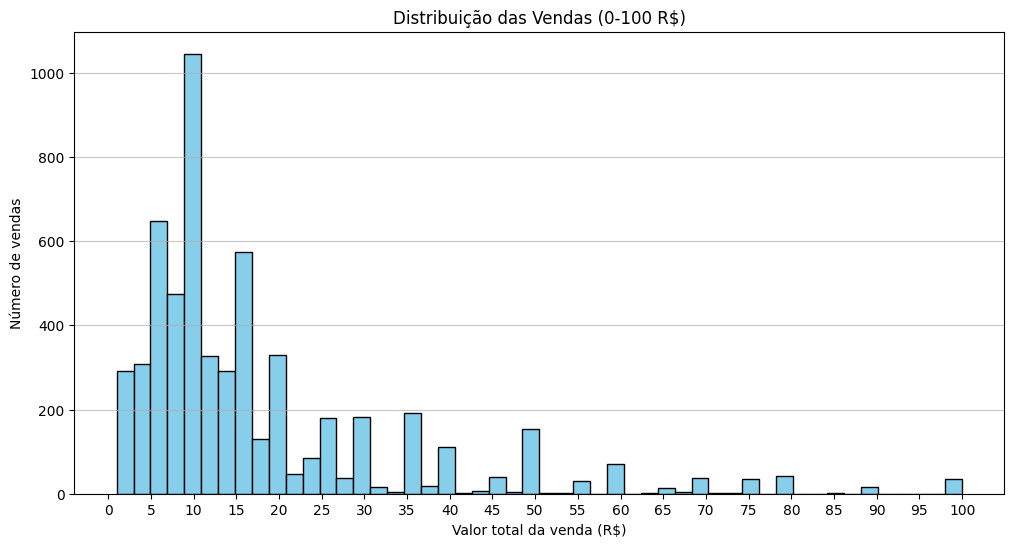

In [38]:
plt.figure(figsize=(12,6))
x = []
for i in range(0,105, 5):
    x.append(i)
plt.hist(df_valor["valorTotal"][df_valor["valorTotal"] <= 100], bins=50, color="skyblue", edgecolor="black")
plt.xticks(x)
plt.xlabel("Valor total da venda (R$)")
plt.ylabel("Número de vendas")
plt.title("Distribuição das Vendas (0-100 R$)")
plt.grid(axis="y", alpha=0.7)
plt.show()


Formas de pagamento mais utilizadas:
###### (Selecionando as que foram usadas mais de 50 vezes pra evitar outliers)

In [39]:
df_pag = df.copy()
df_pag["qnt"] = df_pag.groupby("forma_pag")["forma_pag"].transform("count")
df_pag = df_pag.loc[df_pag['qnt'] > 50,["forma_pag", "qnt"]]
df_pag = df_pag.drop_duplicates().rename(columns={
    "forma_pag": "Forma de pagamento",
    "qnt": "Quantidade"
})
print(f"{"Forma de pagamento":<25} {"Quantidade":>10}")
for forma, qnt in df_pag.values:
    print(f"{forma:<25} {qnt:>10}")

Forma de pagamento        Quantidade
PIX                           2160.0
DINHEIRO                      1124.0
CARTÃO CRÉDITO                1026.0
CARTÃO DÉBITO                 1161.0
NÃO CHECADO                    165.0
CARNÊ                          122.0


#### **Descobertas Gerais do EDA e relatório dos Dados**

##### **1. Origem e Limpeza dos Dados**
- Os dados vieram de quatro relatórios Excel do sistema de uma loja existente, **cada relatório tinha estrutura diferente**, o que exigiu scripts separados de extração e correção encontrados no arquivo de **01_limpeza**.
- O CSV final somou **~4800 vendas**, cobrindo aproximadamente **288 dias**.
- Foram encontradas inconsistências:  
  - duas formas de pagamento (“PIX” e “PIX DIRETO”), depois padronizadas para somente um PIX;  
  - campos vazios, transformados em “NÃO CHECADO”;  
  - produtos de teste e registros atípicos;  
  - pequenas variações de preço para o mesmo produto (natural em varejo).
Após a limpeza, os dados ficaram consistentes para análise.

##### **2. Produtos**
- Existem **1100+ produtos únicos**, mas **muitos foram vendidos apenas uma vez** — indicando baixa rotatividade ou compras pontuais, que é previsivel devido ao estilo de produtos e estoque da loja ( loja de variedades ).
- Os itens mais vendidos são baratos e de giro rápido, como “MEIA INFANTIL 3D PERSONAGENS FEMININO”, desconsiderando o MAIS vendido uma vez que "EMBALAGENS" são embalagens de presente vendidas JUNTO com outros produtos.
- Já os itens que mais geram receita incluem **kits de canetas 24 pcs**, mostrando que **preço × volume** nem sempre se alinham.

##### **3. Vendas ao Longo do Tempo**
- A loja vende cerca de **30 itens por dia** ou **~616 por mês**.
- Eventos sazonais como **Dia das Mães, Pais e Páscoa** tiveram impacto pequeno.
- Porém, o **Dia das Crianças** gerou um salto de quase **5×** nas vendas semanais, explicado pelo tipo de produtos comerciados e localização da loja ao lado de duas escolas, simbolizando GRANDE prioridade de foco nos produtos vendidos nesse mês no próximo ano e mensalmente também.

##### **4. Valores das Vendas**
- **Ticket médio** próximo de **R$ 19**.
- A distribuição é concentrada em vendas baixas (produtos baratos), mas com cauda longa — alguns poucos pedidos chegam a >R$ 400.
- Mediana, média e moda ficam próximas, indicando estabilidade no valor típico consumido.

##### **5. Formas de Pagamento**
- Predomínio claro do **PIX**, seguido por **débito**, **dinheiro** e **crédito**.
- Alguns métodos muito raros (ex: Banese) foram filtrados pelo requesito de pelo menos 50 vendas na analise de Formas de pagamento mais utilizadas, mas não influenciam a análise.

#### **6. Limitações**
- Seria de ajuda de análise obter a classificação em certos grupos como "maquiagens", "acessórios", porém não é algo imbutido no registro do sistema, seria possível categorizar produtos de forma confiável porém não sem um grande esforço manual ou uso de LLM paga. 
- A nomenclatura extremamente variada dos produtos inviabiliza uma classificação automática simples como a do sklearn.
- A primeira semana/mês tem menos vendas devido à adaptação dos funcionários ao sistema.

#### **7. Próximos Passos**
- Coletar os dados do restante do ano para avaliar o comportamento no Natal e fechar os 365 para melhor análise.
- Criar um **modelo preditivo simples** de demanda por produto ou por categoria temporal.
